
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 

This is a classification problem.<br>Classification is generally used to predict discrete values.This model should predict if a student will fail or pass. 

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read student data

data=pd.read_csv('student-data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [3]:
# Calculate number of students

n_students = len(data.index)

In [4]:
# Calculate number of features

n_features = len(data.columns)

In [5]:
# Calculate passing students

n_passed=data['passed'].value_counts()['yes']

In [6]:
# Calculate failing students

n_failed=data['passed'].value_counts()['no']

In [7]:
# Calculate graduation rate

grad_rate=(n_passed/n_students)*100

In [8]:
# Print the results
print('Total number of students:- ',n_students)
print('Total number of features for each student:- ',n_features)
print('Number of those students who have passed:- ',n_passed)
print('Number of those students who have failed:- ',n_failed)
print('Graduation rate in %:- ',round(grad_rate,2))

Total number of students:-  395
Total number of features for each student:-  31
Number of those students who have passed:-  265
Number of those students who have failed:-  130
Graduation rate in %:-  67.09


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [9]:
# Extract feature columns

In [10]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [11]:
# Extract target column 'passed'

In [12]:
data['passed']

0       no
1       no
2      yes
3      yes
4      yes
      ... 
390     no
391    yes
392     no
393    yes
394     no
Name: passed, Length: 395, dtype: object

In [13]:
# Separate the data into feature data and target data (X and y, respectively)

In [14]:
X=data.drop(['passed'],axis=1)
y=data['passed']

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [15]:
X.replace(['yes', 'no'], [1, 0],inplace=True)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,0,0,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,0,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,1,1,0,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,1,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,0,0,4,3,2,1,2,5,4


In [16]:
X=pd.get_dummies(X)
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,3,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   schoolsup          395 non-null    int64
 7   famsup             395 non-null    int64
 8   paid               395 non-null    int64
 9   activities         395 non-null    int64
 10  nursery            395 non-null    int64
 11  higher             395 non-null    int64
 12  internet           395 non-null    int64
 13  romantic           395 non-null    int64
 14  famrel             395 non-null    int64
 15  freetime           395 non-null    int64
 16  goout              395 non-null    int64
 17  Dalc            

### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [18]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24,random_state=42)

In [19]:
# Show the results of the split
print (" No. of samples in training set:- ", X_train.shape[0])
print (" No. of samples in testing set:- " ,X_test.shape[0])

 No. of samples in training set:-  300
 No. of samples in testing set:-  95


### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

1. KNN Model
2. Random Forest Model
3. Extreme gradient Boosting

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

#explaination

1. KNN Model:<br>Fast and simple model, but sensitive to noisy data, missing values and outliers. Here there are no missing values, hence suitable.
2. Random Forest Model:<br>Accurate, but requires high computational power.Since it is a comparitively smaller dataset, its ok.
3. Extreme gradient Boosting:<br>Accurate,flexible but requires high computational power.

In [20]:
# Import the three supervised learning models from sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [21]:
# fit model-1  on traning data 

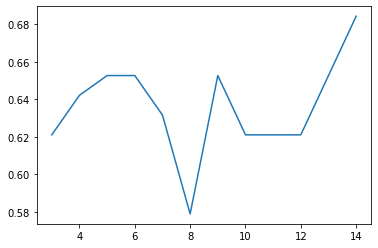

In [22]:
#to find optimal k value
from sklearn.metrics import accuracy_score
acc_values=[]
for k in np.arange(3,15):
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_pred,y_test)
    acc_values.append(acc)
plt.plot(np.arange(3,15),acc_values)
plt.show()

k value = 14 will give the most accurate model

In [23]:
# predict on the test data 

In [24]:
classifier=KNeighborsClassifier(n_neighbors=14,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [25]:
# calculate the accuracy score

In [26]:
#evaluating the performance of the model
print('Accuracy score:- ',round(accuracy_score(y_test,y_pred),2))

Accuracy score:-  0.68


In [27]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

In [28]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

print('Accuracy score:- ',round(accuracy_score(y_test,y_pred),2))

Accuracy score:-  0.64


In [29]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

In [30]:
xgb=XGBClassifier(verbosity=0)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

print('Accuracy score:- ',round(accuracy_score(y_test,y_pred),2))

Accuracy score:-  0.67


C:\Users\jacob\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
